In [ ]:
# importing all the libraries for data mauplation, visualization, testing, checking skewness
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy.stats import ttest_ind

In [ ]:
# This function will load the data file while handling the exceptions
def load_file(path):
    try:
        df = pd.read_csv(path)
        print('Data loaded successfully')
        return df
    except FileNotFoundError:
        print("File not found")
    except pd.errors.EmptyDataError:
        print("No data")
    except pd.errors.ParserError:
        print("Error parsing file")
    except Exception as e:
        print(f"An error occurred: {e}")

path = '/content/nearest-earth-objects(1910-2024).csv'
df = load_file(path)

if df is not None:
    print(df.head())


Data loaded successfully
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1      

In [ ]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [ ]:
df.shape

(338199, 9)

In [ ]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


cheking the data distribution by plotting the histogram

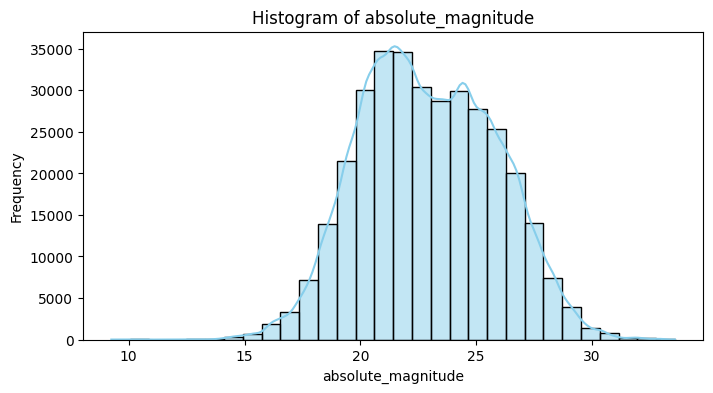

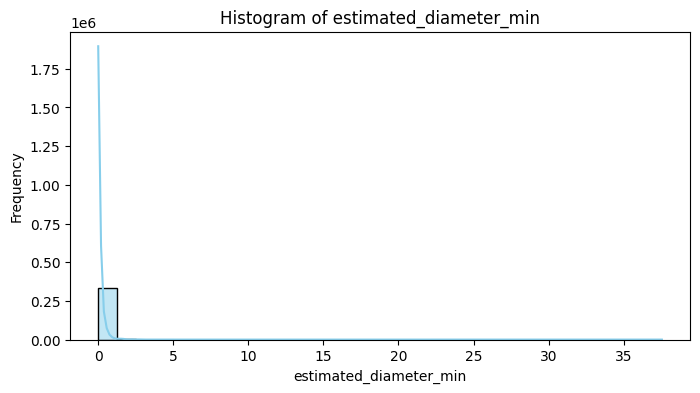

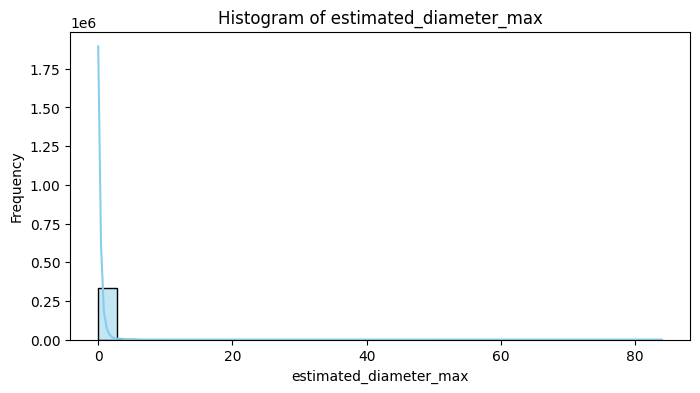

In [ ]:
col_null=df.columns[df.isnull().any()]

for column in col_null:
    if df[column].dtype in ["int64", 'float64']:
        plt.figure(figsize=(8,4))
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

checking the skewness for each column which having null values

In [ ]:
for column in col_null:
    if df[column].dtype in ["int64",'float64']:
        skew_value=skew(df[column].dropna())
        print(f"Skewness for {column}: {skew_value:.2f}")

Skewness for absolute_magnitude: 0.08
Skewness for estimated_diameter_min: 30.96
Skewness for estimated_diameter_max: 30.96


Applying cube transformation for decreasing the skewness

Skewness after cube root transformation:
Estimated Diameter Min: 1.11
Estimated Diameter Max: 1.11


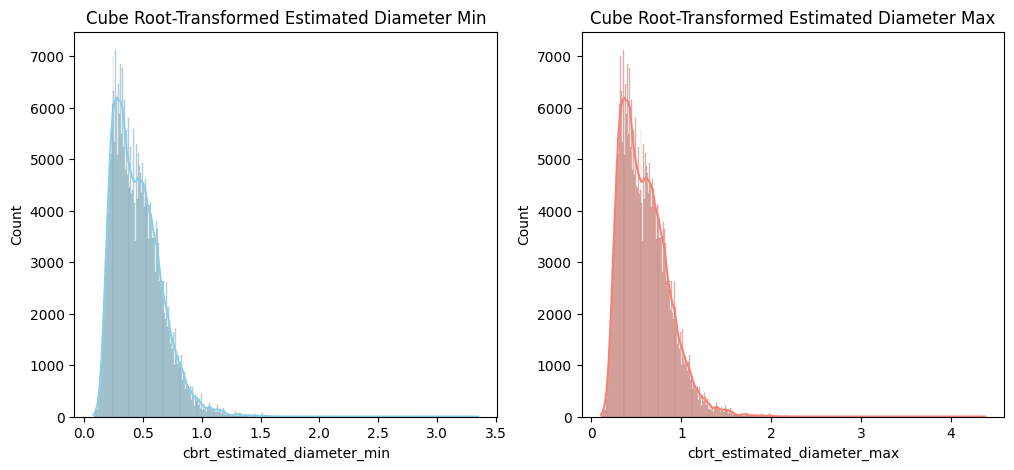

In [ ]:
# Apply cube root transformation
df['cbrt_estimated_diameter_min'] = np.cbrt(df['estimated_diameter_min'])
df['cbrt_estimated_diameter_max'] = np.cbrt(df['estimated_diameter_max'])

# Check skewness after cube root transformation
print("Skewness after cube root transformation:")
print(f"Estimated Diameter Min: {skew(df['cbrt_estimated_diameter_min'].dropna()):.2f}")
print(f"Estimated Diameter Max: {skew(df['cbrt_estimated_diameter_max'].dropna()):.2f}")

# Plot histograms after cube root transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['cbrt_estimated_diameter_min'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Cube Root-Transformed Estimated Diameter Min")
sns.histplot(df['cbrt_estimated_diameter_max'].dropna(), kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Cube Root-Transformed Estimated Diameter Max")
plt.show()

Modifying the data frame with the updated dataframes

In [ ]:
df['estimated_diameter_min'] = df['cbrt_estimated_diameter_min']
df['estimated_diameter_max'] = df['cbrt_estimated_diameter_max']

Filling mean based on linear distribution

In [ ]:
df["absolute_magnitude"].fillna(df["absolute_magnitude"].mean(), inplace=True)

<ipython-input-101-dc16e8972fe8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["absolute_magnitude"].fillna(df["absolute_magnitude"].mean(), inplace=True)


Filling median based on skewness which is near to 1

In [ ]:
# Example: Filling missing values using median
df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].median(), inplace=True)
df['estimated_diameter_max'].fillna(df['estimated_diameter_max'].median(), inplace=True)

<ipython-input-102-eb052409ccac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].median(), inplace=True)
<ipython-input-102-eb052409ccac>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Checking the skewness after filling the null values

In [ ]:
# Rechecking skewness after imputation
skew_min = df['estimated_diameter_min'].skew()
skew_max = df['estimated_diameter_max'].skew()
print("Skewness after imputation:")
print(f"Estimated Diameter Min: {skew_min}")
print(f"Estimated Diameter Max: {skew_max}")

Skewness after imputation:
Estimated Diameter Min: 1.105179368883836
Estimated Diameter Max: 1.1051793689449556


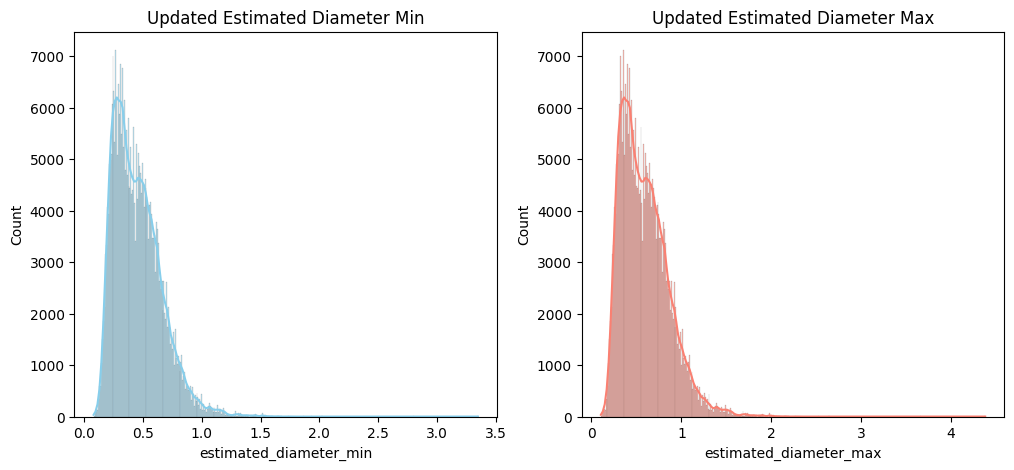

In [ ]:
# Plot histograms for updated columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['estimated_diameter_min'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Updated Estimated Diameter Min")

sns.histplot(df['estimated_diameter_max'].dropna(), kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Updated Estimated Diameter Max")

plt.show()

Converting category data type to int
Filling the dummy vales for orbiting body

In [ ]:
df['is_hazardous'] = df['is_hazardous'].astype(int)
df = pd.get_dummies(df, columns=['orbiting_body'], drop_first=True)

In [ ]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,cbrt_estimated_diameter_min,cbrt_estimated_diameter_max
count,3.381990e+05,338199.000000,338199.000000,338199.000000,338199.000000,3.381990e+05,338199.000000,338171.000000,338171.000000
mean,1.759939e+07,22.932525,0.452065,0.591147,51060.662908,4.153535e+07,0.127623,0.452068,0.591151
std,2.287225e+07,2.911096,0.203418,0.266001,26399.238435,2.077399e+07,0.333670,0.203426,0.266012
min,2.000433e+06,9.250000,0.079956,0.104555,203.346433,6.745533e+03,0.000000,0.079956,0.104555
25%,3.373980e+06,20.740000,0.293890,0.384309,30712.031471,2.494540e+07,0.000000,0.293890,0.384309
50%,3.742127e+06,22.800000,0.418329,0.547033,47560.465474,4.332674e+07,0.000000,0.418329,0.547033
75%,5.405374e+07,25.100000,0.573920,0.750493,66673.820614,5.933961e+07,0.000000,0.573920,0.750493
max,5.446281e+07,33.580000,3.348510,4.378715,291781.106613,7.479865e+07,1.000000,3.348510,4.378715


In [ ]:
# Create a new feature 'risk_factor' by combining 'velocity' and 'size'
df['risk_factor'] = df['relative_velocity'] / df['miss_distance']


In [ ]:
df.head(5)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,cbrt_estimated_diameter_min,cbrt_estimated_diameter_max,risk_factor
0,2162117,162117 (1998 SD15),19.14,0.733700,0.959430,71745.401048,5.814362e+07,0,0.733700,0.959430,0.001234
1,2349507,349507 (2008 QY),18.50,0.809441,1.058474,109949.757148,5.580105e+07,1,0.809441,1.058474,0.001970
2,2455415,455415 (2003 GA),21.45,0.514658,0.672997,24865.506798,6.720689e+07,0,0.514658,0.672997,0.000370
3,3132126,(2002 PB),20.63,0.583694,0.763273,78890.076805,3.039644e+07,0,0.583694,0.763273,0.002595
4,3557844,(2011 DW),22.70,0.424800,0.555495,56036.519484,6.311863e+07,0,0.424800,0.555495,0.000888


In [ ]:
# Display data types of all columns
print(df.dtypes)


neo_id                           int64
name                            object
absolute_magnitude             float64
estimated_diameter_min         float64
estimated_diameter_max         float64
relative_velocity              float64
miss_distance                  float64
is_hazardous                     int64
cbrt_estimated_diameter_min    float64
cbrt_estimated_diameter_max    float64
risk_factor                    float64
dtype: object


In [ ]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,cbrt_estimated_diameter_min,cbrt_estimated_diameter_max,risk_factor
0,2162117,162117 (1998 SD15),19.14,0.733700,0.959430,71745.401048,5.814362e+07,0,0.733700,0.959430,0.001234
1,2349507,349507 (2008 QY),18.50,0.809441,1.058474,109949.757148,5.580105e+07,1,0.809441,1.058474,0.001970
2,2455415,455415 (2003 GA),21.45,0.514658,0.672997,24865.506798,6.720689e+07,0,0.514658,0.672997,0.000370
3,3132126,(2002 PB),20.63,0.583694,0.763273,78890.076805,3.039644e+07,0,0.583694,0.763273,0.002595
4,3557844,(2011 DW),22.70,0.424800,0.555495,56036.519484,6.311863e+07,0,0.424800,0.555495,0.000888


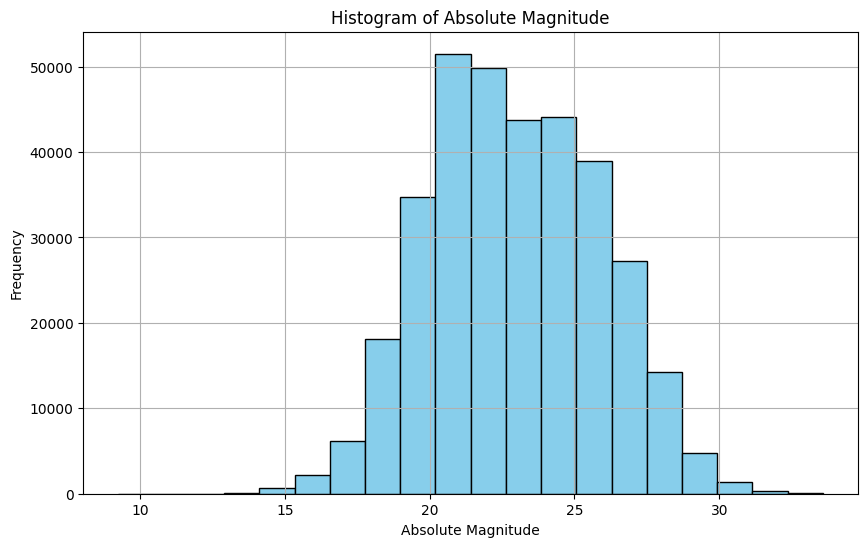

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['absolute_magnitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# This graph shows the distribution of the intrinsic brightness of the nearest Earth objects (NEOs). Most of the objects have an absolute magnitude in the range of approximately 18 to 22, indicating their brightness.

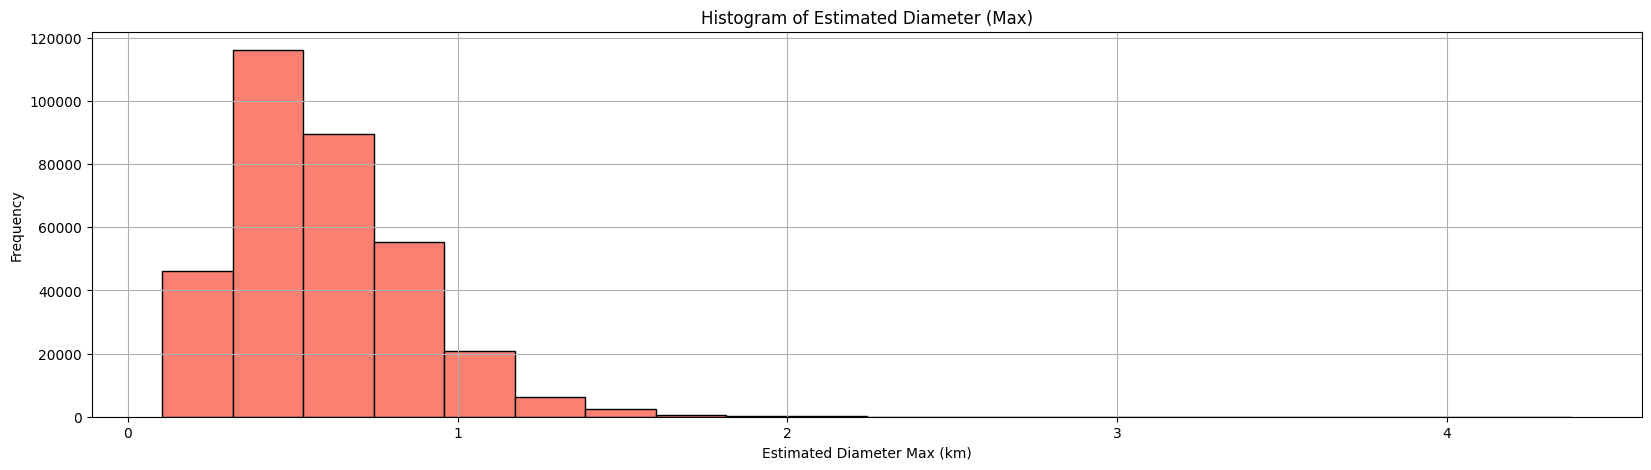

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(df['estimated_diameter_max'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Estimated Diameter (Max)')
plt.xlabel('Estimated Diameter Max (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# This graph displays the size distribution of the objects. The majority of the NEOs have a maximum estimated diameter of less than 1 km, with a few objects larger than that.

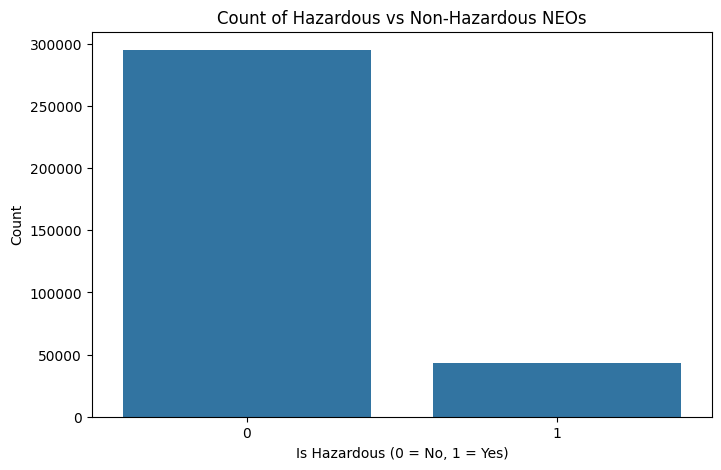

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='is_hazardous', data=df)
plt.title('Count of Hazardous vs Non-Hazardous NEOs')
plt.xlabel('Is Hazardous (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# shruthi eda

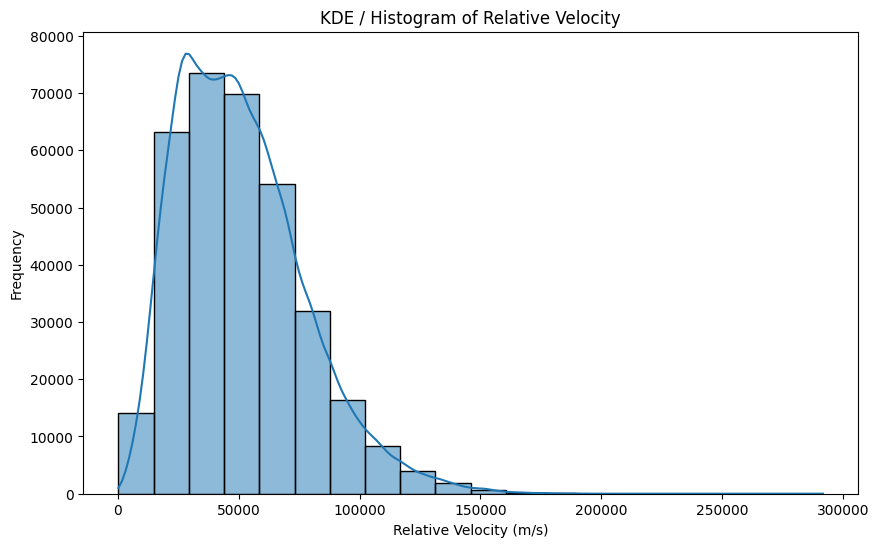

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='relative_velocity', kde=True, bins=20)
plt.title('KDE / Histogram of Relative Velocity')
plt.xlabel('Relative Velocity (m/s)')
plt.ylabel('Frequency')
plt.show()

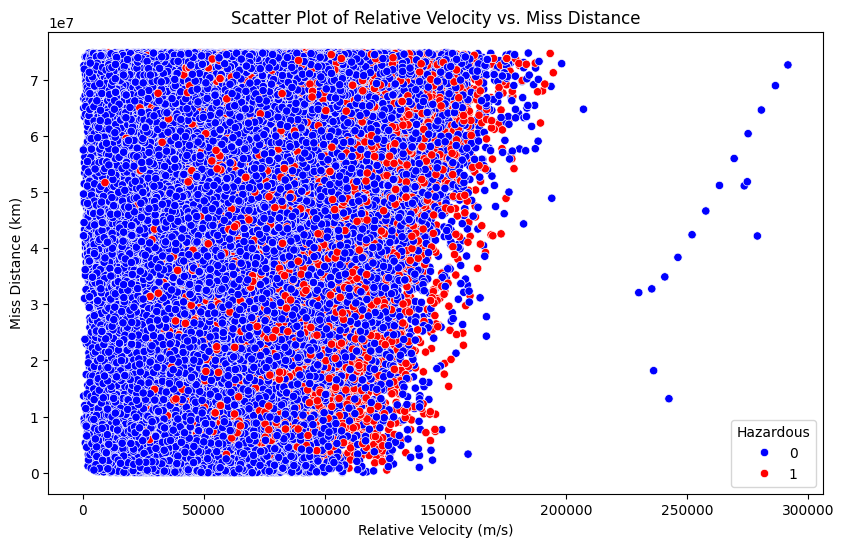

In [ ]:
# Plot 2: Scatter Plot of Relative Velocity vs. Miss Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='relative_velocity', y='miss_distance', hue='is_hazardous', palette={True: 'red', False: 'blue'})
plt.title('Scatter Plot of Relative Velocity vs. Miss Distance')
plt.xlabel('Relative Velocity (m/s)')
plt.ylabel('Miss Distance (km)')
plt.legend(title="Hazardous")
plt.show()


The below scatter plot depicts the relationship between estimated_diameter_max and absolute_magnitude is shown, revealing an inverse trend. Larger diameters are associated with lower absolute magnitudes, indicating that bigger objects tend to be brighter. This plot suggests a strong, nonlinear correlation between the size of the objects and their brightness.

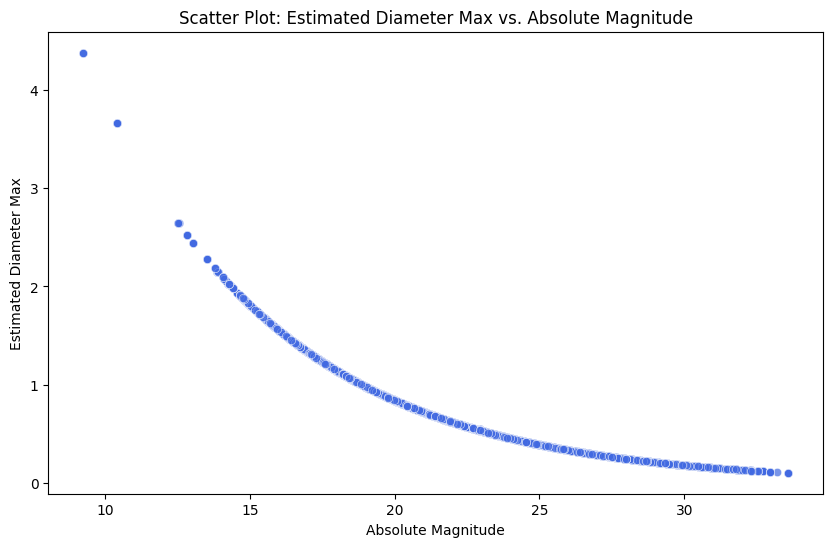

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='absolute_magnitude', y='estimated_diameter_max', color='royalblue', alpha=0.7)
plt.title("Scatter Plot: Estimated Diameter Max vs. Absolute Magnitude")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Estimated Diameter Max")
plt.show()

The below violin plot provides a visual comparison of the miss_distance distribution between hazardous and non-hazardous objects. Both groups exhibit a similar shape in distribution, with only slight differences in their medians, potentially indicating a minor variation in average miss distances. The density patterns within the violins reflect the spread and range of distances, without any major asymmetries between the groups.

<ipython-input-29-2eca7ae9fc35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='is_hazardous', y='miss_distance', palette='Set2')


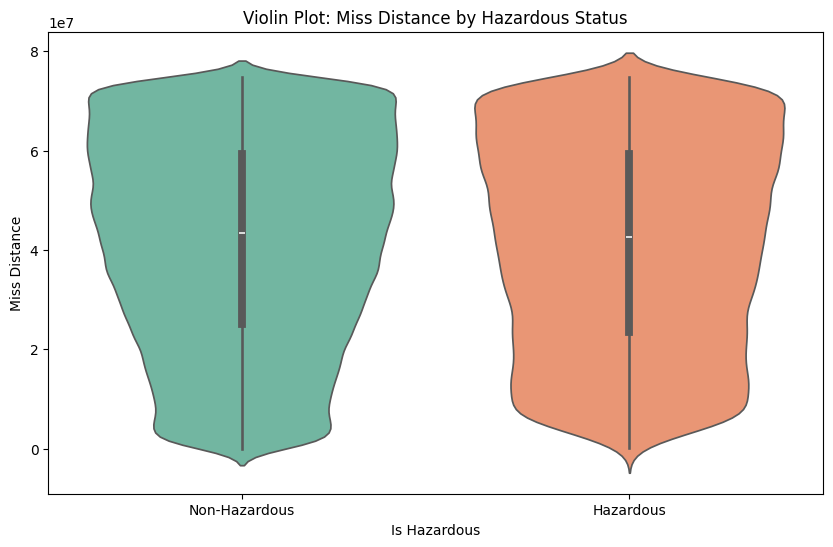

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='is_hazardous', y='miss_distance', palette='Set2')
plt.title("Violin Plot: Miss Distance by Hazardous Status")
plt.xlabel("Is Hazardous")
plt.ylabel("Miss Distance")
plt.xticks([0, 1], ['Non-Hazardous', 'Hazardous'])
plt.show()

In [ ]:
hazardous = df[df['is_hazardous'] == 1]['miss_distance']
non_hazardous = df[df['is_hazardous'] == 0]['miss_distance']

t_stat, p_value = ttest_ind(hazardous, non_hazardous)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -3.8032779676307853, P-value: 0.00014281905134896032


The independent t-test analyzes the miss_distance for hazardous and non-hazardous objects, assessing if there’s a meaningful difference between the two. The T-statistic represents the difference's size, and the p-value indicates whether this difference is due to chance. A p-value below 0.05 would confirm a statistically significant difference in miss distances between hazardous and non-hazardous objects.

<ipython-input-31-7286835d2b6c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_hazardous', y='relative_velocity', data=df, palette='viridis')


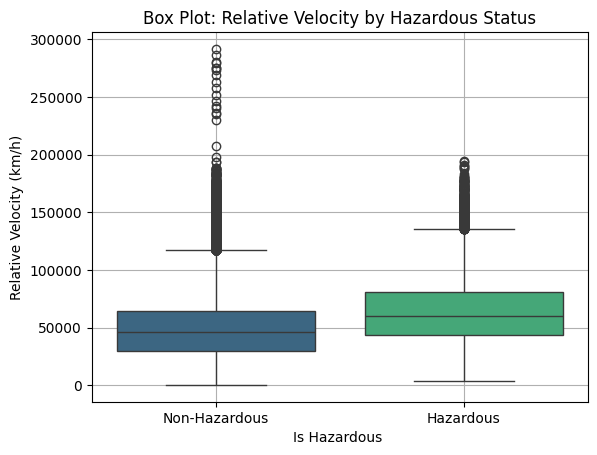

In [ ]:
sns.boxplot(x='is_hazardous', y='relative_velocity', data=df, palette='viridis')

plt.xlabel('Is Hazardous ')
plt.ylabel('Relative Velocity (km/h)')
plt.title('Box Plot: Relative Velocity by Hazardous Status')
plt.xticks([0, 1], ['Non-Hazardous', 'Hazardous'])
plt.grid(True)
plt.show()

#The box plot shows that hazardous Near-Earth Objects (NEOs) have a higher median relative velocity compared to
#non-hazardous ones, indicating a greater risk of impact. Also, the wider variability in velocities for hazardous
#NEOs suggests that some travel significantly faster

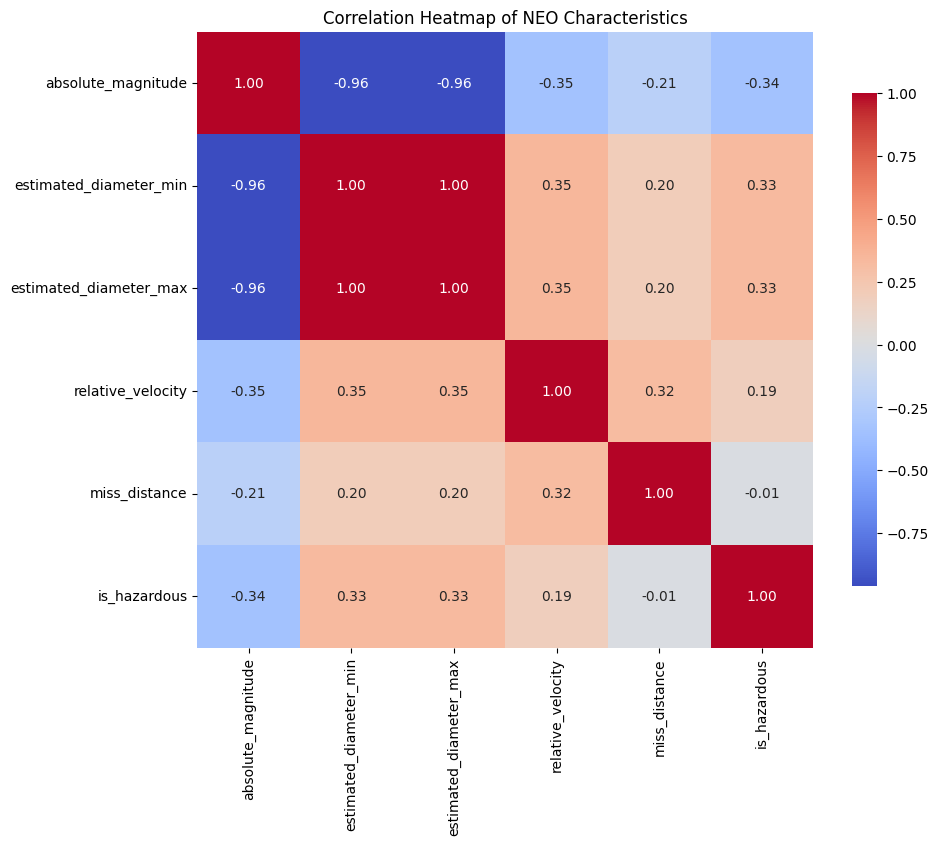

In [ ]:
correlation_matrix = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'is_hazardous']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of NEO Characteristics')
plt.show()

# 1. There is a moderate positive correlation between relative_velocity and miss_distance (0.31)
#    This indicates that NEOs with higher relative velocities are likely to have greater miss distances
#    from Earth, which may imply a relationship between the speed of the NEO and how far it passes from our planet.

# 2. There are strong negative correlations between absolute_magnitude and both estimated_diameter_min and
#    estimated_diameter_max (-0.59), indicating that as absolute magnitude increases, the estimated diameters decrease,
#    that means larger magnitudes correspond to smaller sizes.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
# Selecting features and target variable
features = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                 'relative_velocity', 'miss_distance', 'risk_factor']]
target = df['is_hazardous']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


RANDOM FOREST CLASSIFIER - It effectively deals with non-linear data, handles numerical and categorical features, and offers high accuracy while avoiding overfitting. The use of the ensemble technique enables leveraging various decision trees.

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initial Evaluation
y_pred = model.predict(X_test)
print("Initial Model Performance:")
print(classification_report(y_test, y_pred))

Initial Model Performance:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     59011
           1       0.73      0.58      0.64      8629

    accuracy                           0.92     67640
   macro avg       0.83      0.77      0.80     67640
weighted avg       0.91      0.92      0.91     67640



1. Hyperparameter Tuning


In [ ]:
#GRID SEARCH
# parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],  #  trees
    'max_depth': [10, 15],  #  depth options
    'min_samples_split': [2, 5],  #  split options
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid_search.best_params_)
best_grid_model = grid_search.best_estimator_


In [ ]:
#RANDOM SEARCH
# Define parameter distribution for Random Search
param_dist = {
    'n_estimators': [50, 300, 50],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=2, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters from Random Search:", random_search.best_params_)
best_random_model = random_search.best_estimator_


Manual Hyperparameter Tuning

n_estimators=200: Increased to 200, providing the model more trees to make a stable and accurate ensemble prediction.

max_depth=35: Limited at 20 to control the complexity of each tree. This helps in preventing overfitting, especially when there are fewer samples or noisier data.

min_samples_split=4: Set to 4 to ensure that each split has a sufficient number of samples. This adds regularization, preventing overly specific splits that may not generalize well to unseen data.

class_weight='balanced': Chosen to handle the class imbalance, where the minority class (hazardous objects) gets more emphasis in the model's training, improving recall for class 1.

In [ ]:
final_model = RandomForestClassifier(n_estimators=200, max_depth=25, min_samples_split=4, class_weight='balanced', random_state=42)
final_model.fit(X_train, y_train)

# Evaluation
y_final_pred = final_model.predict(X_test)
print("Final Model Performance:")
print(classification_report(y_test, y_final_pred))

Final Model Performance:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     59011
           1       0.51      0.80      0.63      8629

    accuracy                           0.88     67640
   macro avg       0.74      0.85      0.78     67640
weighted avg       0.91      0.88      0.89     67640



PLOT 1

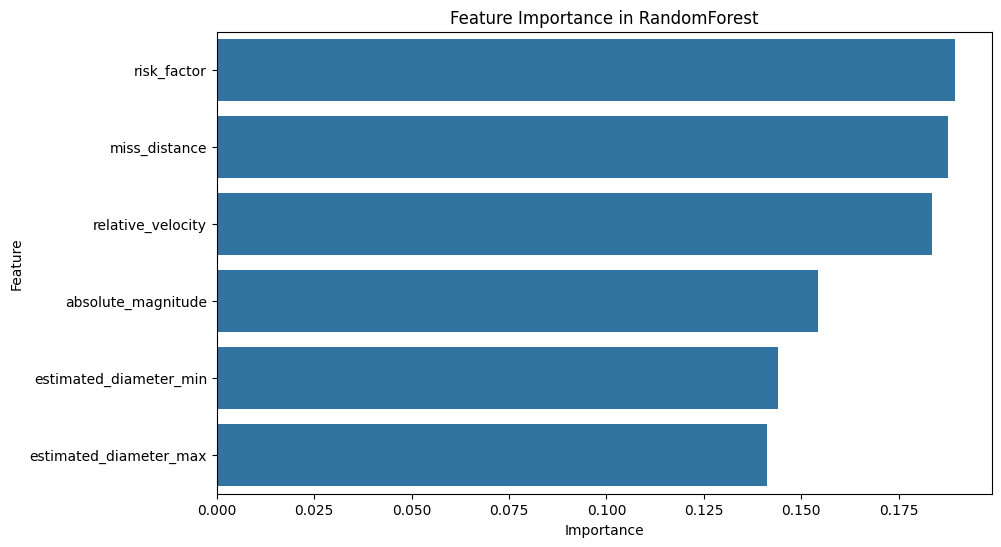

In [ ]:
#1. To check feature importance after fitting
feature_importances = model.feature_importances_
features = features.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Feature importance plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance in RandomForest")
plt.show()

PLOT 2

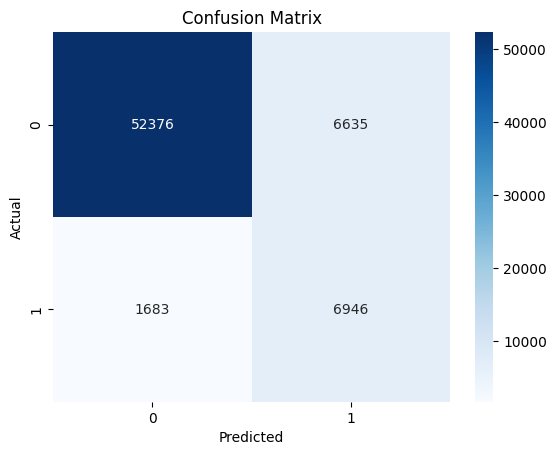

In [ ]:
#2. Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_final_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

PLOT 3

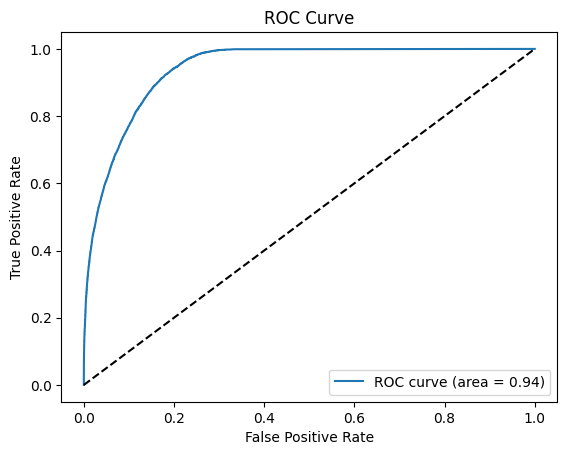

In [ ]:
#3. ROC Curve

y_proba = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()


ramakanth xgboost

In [ ]:
 import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Use the same set of features for both X_train and X_test
X = df[['absolute_magnitude', 'relative_velocity', 'miss_distance', 'estimated_diameter_max']]
y = df['is_hazardous']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = xgb.XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Accuracy: 0.8930958013010053
Precision: 0.7169459962756052
Recall: 0.2677019353343377
F1 Score: 0.38984051978735973


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter distribution for Random Search

param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [10, 20, 30],
    'min_child_weight': [1, 3, 5]  # Use min_child_weight instead of min_samples_split
}

# Initialize the model without 'use_label_encoder'
model = xgb.XGBClassifier(eval_metric='logloss')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # Number of random combinations to try
    cv=2,  # 2-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    random_state=42
)

# Fit the random search
random_search.fit(X_train, y_train)

# Display best parameters and model
print("Best Parameters from Random Search:", random_search.best_params_)
best_random_model = random_search.best_estimator_


Best Parameters from Random Search: {'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 20}


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [10, 20, 30],
    'min_child_weight': [1, 3, 5]  # Using min_child_weight instead of min_samples_split
}

# Initialize the XGBoost model without 'use_label_encoder'
model = xgb.XGBClassifier(eval_metric='logloss')


# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=2,  # 2-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,  # Print progress messages
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and model
print("Best Parameters from Grid Search:", grid_search.best_params_)
best_grid_model = grid_search.best_estimator_


Fitting 2 folds for each of 54 candidates, totalling 108 fits
Best Parameters from Grid Search: {'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 150}


In [ ]:
# Select only the columns present in X_train for X_test
X_test = X_test[X_train.columns]


In [ ]:
# Predict on the test set using the best model from GridSearchCV
y_pred = best_grid_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


Model Performance:
Accuracy: 0.8983441750443525
Precision: 0.675194883070158
Recall: 0.39147062232008345
F1 Score: 0.49559859154929575


<Figure size 1000x800 with 0 Axes>

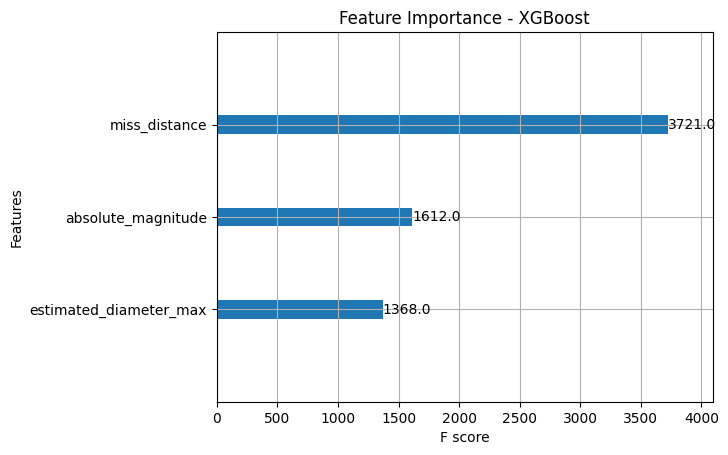

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))

plot_importance(best_random_model, importance_type='weight', title="Feature Importance - XGBoost")
plt.show()

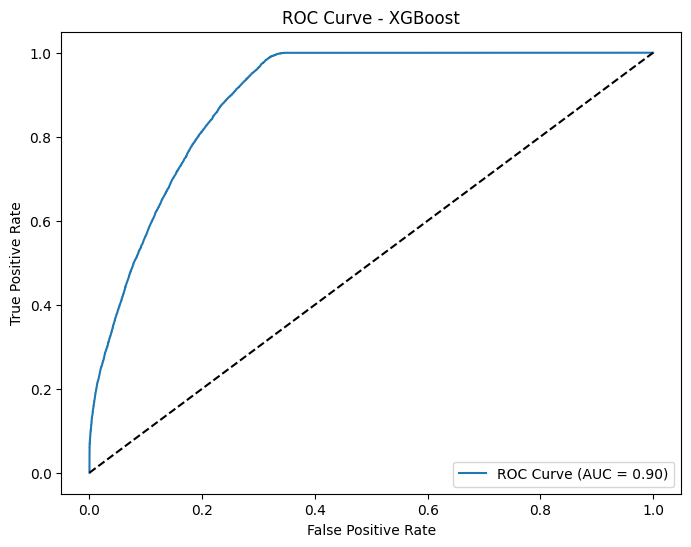

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities and ROC values
y_proba =best_random_model .predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed line for chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()


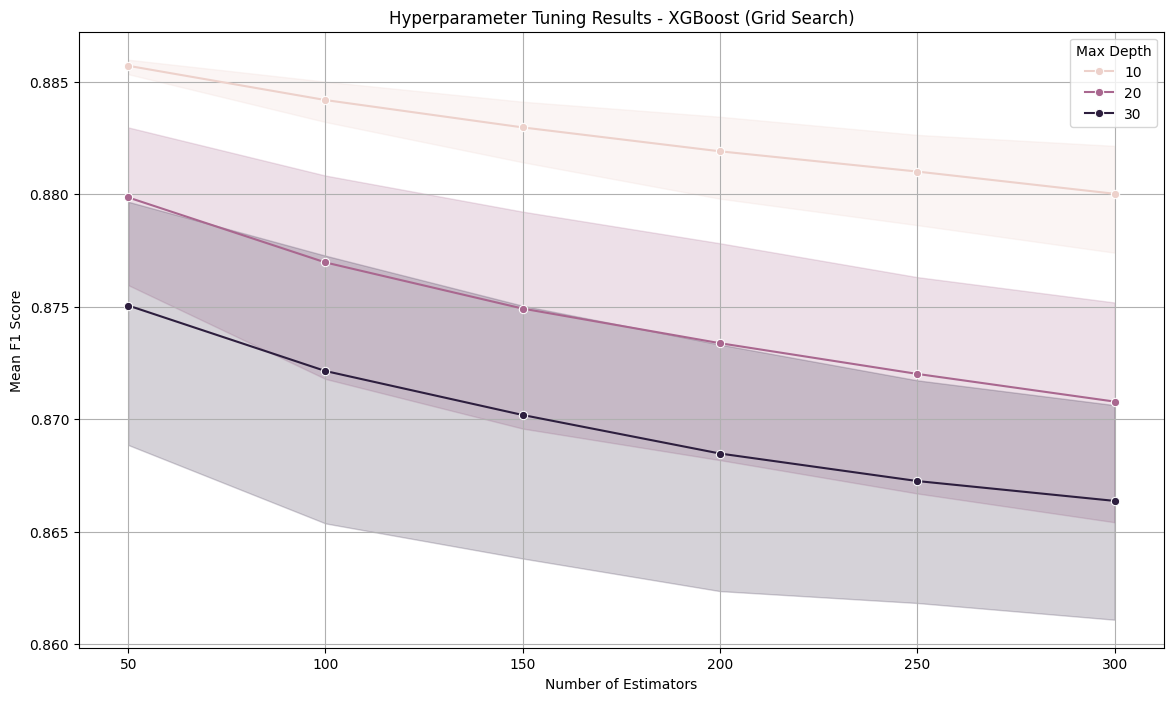

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve and sort results from GridSearchCV
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results = grid_results.sort_values(by='mean_test_score', ascending=False)

# Plot F1 score by n_estimators with max_depth as hue
plt.figure(figsize=(14, 8))
sns.lineplot(data=grid_results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean F1 Score')
plt.title('Hyperparameter Tuning Results - XGBoost (Grid Search)')
plt.legend(title='Max Depth')
plt.grid()
plt.show()


**USK'S MODEL TRAINING AND TUNING**

In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split  # Import train_test_split

# Initialize the imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Impute missing values in Nearest_earth_objects dataset
features = df[['absolute_magnitude', 'estimated_diameter_min',
                                  'estimated_diameter_max', 'relative_velocity',
                                  'miss_distance', 'estimated_diameter_min',
                                  'estimated_diameter_max']]
target = df['is_hazardous']

# Fit and transform the feature data
features_imputed = imputer.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Initialize the SVM model
model = SVC(random_state=42)

# Train the model
print("Training the SVM model...")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Training the SVM model...
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     59011
           1       0.00      0.00      0.00      8629

    accuracy                           0.87     67640
   macro avg       0.44      0.50      0.47     67640
weighted avg       0.76      0.87      0.81     67640

Accuracy: 0.8724275576581905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



**Grid search** is a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV  # Add GridSearchCV here
import numpy as np

# Set up the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=2, verbose=2, n_jobs=-1)

# Fit the model
print("Performing Grid Search...")
grid_search.fit(X_train, y_train)

# Display best parameters from Grid Search
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Evaluate Grid Search Performance
y_pred_grid = grid_search.predict(X_test)
print("Grid Search Classification Report:")
print(classification_report(y_test, y_pred_grid))


Performing Grid Search...
Fitting 2 folds for each of 24 candidates, totalling 48 fits


KeyboardInterrupt: 

**Random search**, on the other hand, selects a value for each hyperparameter independently using a probability distribution.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the parameter distribution for Random Search
param_dist = {
    'C': np.logspace(-2, 2, 10),  # Randomly searching over a logarithmic scale
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(random_state=42), param_distributions=param_dist, n_iter=10, cv=2, verbose=2, n_jobs=-1, random_state=42)

# Fit the model
print("Performing Random Search...")
random_search.fit(X_train, y_train)

# Display best parameters from Random Search
print("Best Parameters from Random Search:")
print(random_search.best_params_)

# Evaluate Random Search Performance
y_pred_random = random_search.predict(X_test)
print("Random Search Classification Report:")
print(classification_report(y_test, y_pred_random))


Manual Hyperparameter Tuning

 Manual hyperparameter tuning involves experimenting with different sets of hyperparameters manually using the trial and error method. The results of each trial are tracked and used as feedback to obtain a combination of hyperparameters that yield the highest model performance.

PLOT 1

PLOT 2

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Manual Tuning
cm = confusion_matrix(y_test, y_pred_manual)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Manual Tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


PLOT 3

In [ ]:
from sklearn.metrics import roc_curve, auc

# You need to binarize the output for multiclass ROC Curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=[0, 1])

# Predict probabilities for ROC curve
y_prob_grid = grid_search.decision_function(X_test)
y_prob_random = random_search.decision_function(X_test)
y_prob_manual = manual_model.decision_function(X_test)

fpr_grid, tpr_grid, _ = roc_curve(y_test_bin, y_prob_grid)
fpr_random, tpr_random, _ = roc_curve(y_test_bin, y_prob_random)
fpr_manual, tpr_manual, _ = roc_curve(y_test_bin, y_prob_manual)

plt.figure()
plt.plot(fpr_grid, tpr_grid, color='blue', lw=2, label='Grid Search (AUC = %0.2f)' % auc(fpr_grid, tpr_grid))
plt.plot(fpr_random, tpr_random, color='green', lw=2, label='Random Search (AUC = %0.2f)' % auc(fpr_random, tpr_random))
plt.plot(fpr_manual, tpr_manual, color='red', lw=2, label='Manual Tuning (AUC = %0.2f)' % auc(fpr_manual, tpr_manual))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()




# Lokesh Decision Tree Implementation


In [ ]:
# Selecting features and target
X = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'miss_distance']]
y = df['is_hazardous']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8593435836782969
Precision: 0.44842056183704393
Recall: 0.44582222737281263
F1 Score: 0.44711761971176195

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     59011
           1       0.45      0.45      0.45      8629

    accuracy                           0.86     67640
   macro avg       0.68      0.68      0.68     67640
weighted avg       0.86      0.86      0.86     67640



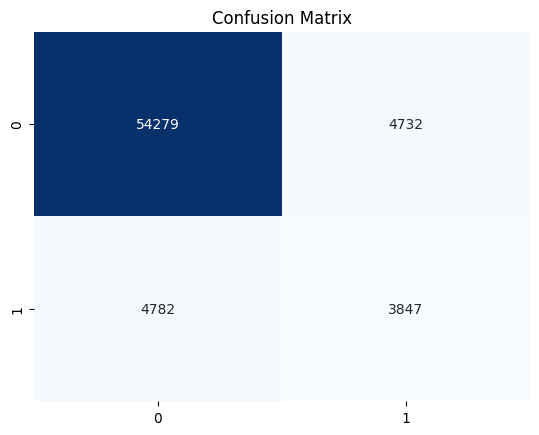

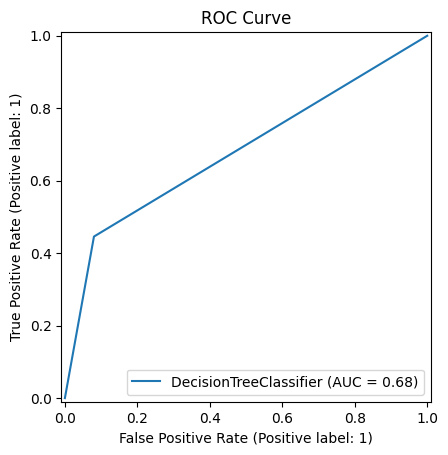

In [ ]:
from sklearn.metrics import confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],          # Maximum depth of tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy'],           # Quality of split: Gini impurity or Entropy
    'max_features': [None, 'sqrt', 'log2'],     # Number of features to consider for the best split
    'class_weight': [None, 'balanced'],          # Handle class imbalance
    'splitter': ['best', 'random']              # Strategy for splitting at each node
}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=10,                # Number of random combinations to try
    cv=3,                     # Cross-validation folds
    scoring='roc_auc',        # Use ROC AUC as evaluation metric
    n_jobs=-1,                # Use all available cores for parallel computation
    random_state=42           # Ensure reproducibility
)

# Fit the model on training data
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

# Use the best model to make predictions and evaluate on the test set
best_model = random_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Use probabilities for ROC AUC calculation

# Calculate ROC AUC score on the test set
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC Score (using probabilities):", test_roc_auc)


Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}
Best ROC AUC Score: 0.8829672759436954
Test ROC AUC Score (using probabilities): 0.8862244843622882


Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}
Best ROC AUC Score: 0.8829672759436954
Test ROC AUC Score (using probabilities): 0.8862244843622882


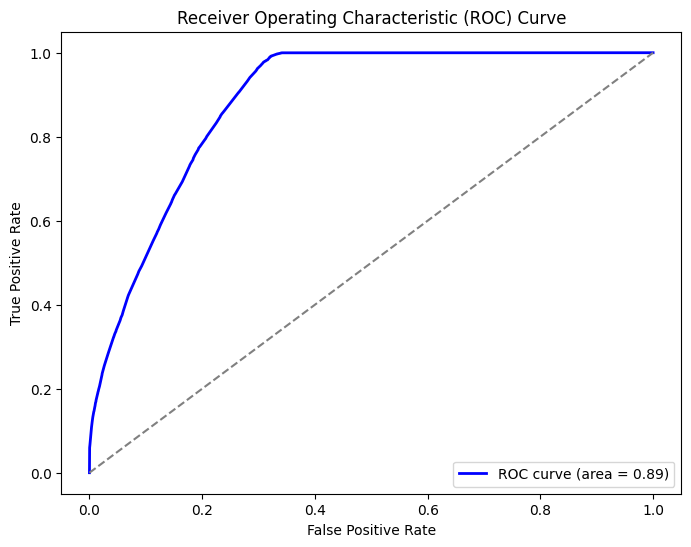

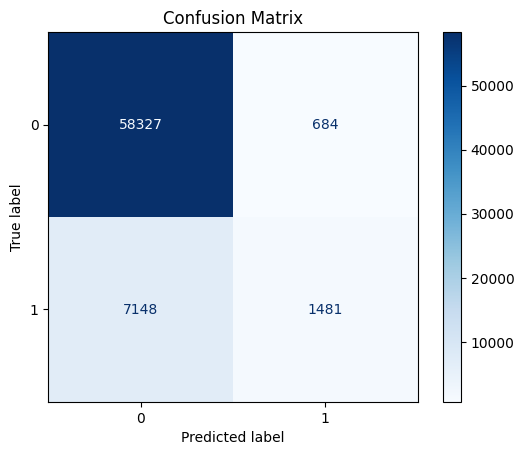

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

# Get the best model
best_model = random_search.best_estimator_

# Predict probabilities for ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC AUC score
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC Score (using probabilities):", test_roc_auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
y_pred = best_model.predict(X_test)  # Get class predictions for confusion matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')  # Display as integers
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df.columns

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('orbiting_body', OneHotEncoder(), ['orbiting_body']),  # Encoding categorical column
        ('num', SimpleImputer(strategy='mean'), X.columns.difference(['orbiting_body']))  # Impute numeric features
    ])


In [ ]:
# Build a pipeline for the logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Standardizing features
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

In [ ]:
 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('orbiting_body',
                                                  OneHotEncoder(),
                                                  ['orbiting_body']),
                                                 ('num', SimpleImputer(),
                                                  Index(['absolute_magnitude', 'estimated_diameter_max',
       'estimated_diameter_min', 'miss_distance', 'relative_velocity'],
      dtype='object'))])),
                ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7363985807214666
Precision: 0.31178660557214743
Recall: 0.8831846100359254
F1 Score: 0.4608732462506047

Confusion Matrix:
 [[42189 16822]
 [ 1008  7621]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.71      0.83     59011
        True       0.31      0.88      0.46      8629

    accuracy                           0.74     67640
   macro avg       0.64      0.80      0.64     67640
weighted avg       0.89      0.74      0.78     67640



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Regularization strength
    'classifier__penalty': ['l2'],  # Regularization type (l2 for logistic regression)
    'classifier__solver': ['lbfgs', 'liblinear'],  # Solvers
    'classifier__max_iter': [100, 200]  # Number of iterations for convergence
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Precision:", precision_score(y_test, y_pred_best))
print("Tuned Recall:", recall_score(y_test, y_pred_best))
print("Tuned F1 Score:", f1_score(y_test, y_pred_best))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Cross-Validation Score: 0.7352666143332133
Tuned Accuracy: 0.736324659964518
Tuned Precision: 0.3117074367994764
Tuned Recall: 0.8830687217522308
Tuned F1 Score: 0.46077097505668935


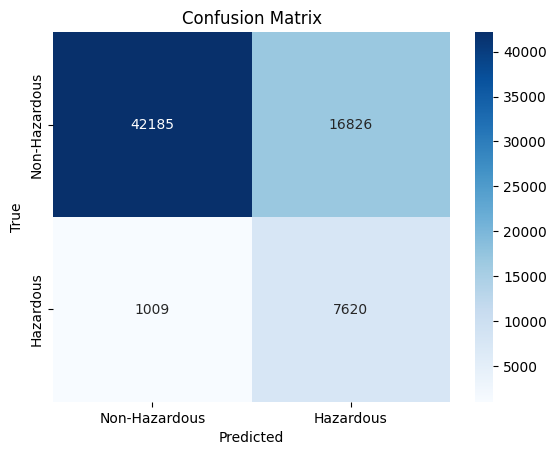

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'], yticklabels=['Non-Hazardous', 'Hazardous'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


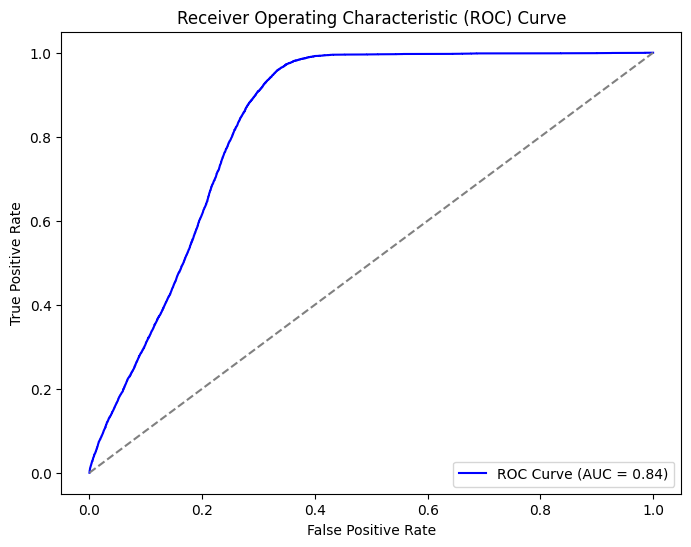

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
